In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Normal-Normal Model

My friend is interested in invested in Average Communications. Beforehand, he wants to know the probability of their stock going up or down a point in a given week. He thinks it's a good investment, which might go up half a point most weeks, but isn't confident in this assessment. He gathers 100 weeks' worth of point changes and creates a model to determine the probability that the stock value will increase or decrease over 5000 weeks. 

First, we generate some datapoints.

In [246]:
data = np.random.normal(loc=0., scale=1., size=100)
N = data.shape[0]

mu = np.mean(data)
sd = np.std(data)

Then, we set the prior parameters and calculate the posterior (and prior) values.

In [247]:
mu_0, sig_0 = 0.5, 0.5

prior = stats.norm(mu_0, sig_0)

post_mu = ((mu_0 / sig_0**2) + (mu / sd**2)) / ((1 / sig_0**2) + (N / sd**2))
post_sig = 1. / ((1. / sig_0**2) + (N / sd**2))

posterior = stats.norm(post_mu, post_sig)

Finally, we plot the probability density functions of the prior and posterior. Since the data samples were few, the prior has shifted the posterior pdf slightly to the right of 0.

In [248]:
x = np.linspace(-1, 1, 5000)
prior_density = prior.pdf(x)
post_density = posterior.pdf(x)

Text(0.5, 1.0, '')

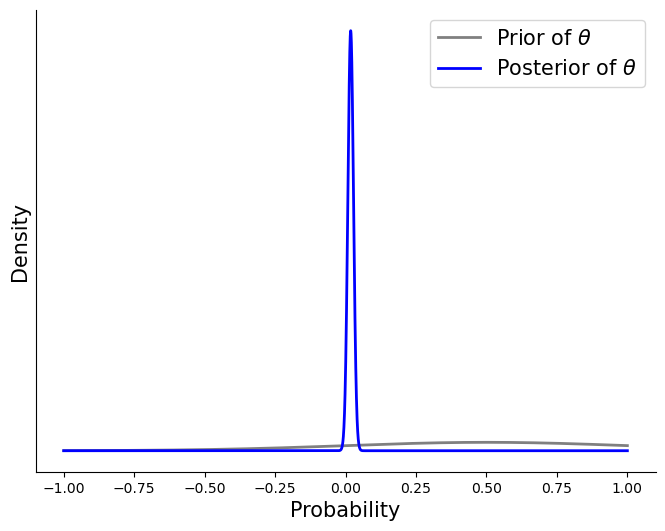

In [249]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, prior_density, color='gray', lw=2, label=r'Prior of $\theta$')
ax.plot(x, post_density, color='blue', lw=2, label=r'Posterior of $\theta$')
sns.despine(ax=ax)
ax.set_xlabel('Probability', fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.set_yticks([])
ax.legend(fontsize=15)
ax.set_title('')